<a href="https://colab.research.google.com/github/rcortezk9/tensorflow_lessons/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:

* Binary classification
* Mutliclass classifcation
* Multilable classification

In [ ]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.4.1'

 ## Creating a data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now.. let's visualize it!


In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label':y})
circles 


,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


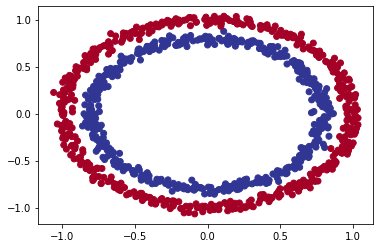

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

🛠 **Exercise:** Before pushing forward, spend 10-minutes playing around with playground.tensorflow.org building and running different neural networks. See what happens when you change different hyperparameters.

## Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working 
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels 
X[5], y[5]

(array([-0.47964637,  0.67643477]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model 
5. etc...

In [ ]:


# Set the random seed
tf.random.set_seed(42)

# 1. Create t he mocel using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 909us/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 948us/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 905us/step - loss: 0.6937 - accuracy: 0.5157


In [ ]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 865us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as 

So let's step things up a notch and add an extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model 
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

 ### Improve our model

 Let's look into our bag of tricks to see how we can imporve our model

 1. Create a model - we might want to add more layer or increase the number of hidden units within a layer. 
 2. Compile the model - here we might want to choose a different optimization function such as Adam instead of SGD
 3. Fit the model - perhapse we might fit our model for more epochs (leave it training for longer)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 980us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

To visulize our model's predictions, let's create a function `plot_decision_boundary()`, this function will 

* take in a tained model, features (X) and labels(y)
* Create a meshgrid of the different X values
* Make a predictions across the meshgrid
* Plot the predictions as well as line between zones (Where each unique classs falls)


In [ ]:
import numpy as np

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    plots the decision boundary created by a model predictiong on X.
    This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study
    2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Precptrons/09_TF_Multilayer_Perceptrons.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our precitions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape) 

    # Plot the decision boundary
    plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


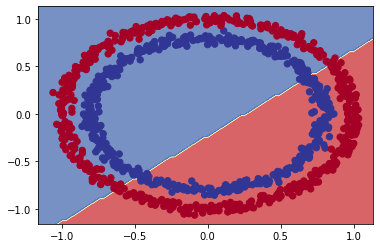

In [ ]:
# Check out the predictions our model is making 
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# Set the seed
tf.random.set_seed(42)

# create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
# model_3.fit(X_reg_train, y_reg_train, epochs=100) <- gave us an error/commented it out

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [ ]:
# Random seed
tf.random.set_seed(42)

# 1. Create the model 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 269.0470 - mae: 269.0470
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 154.3811 - mae: 154.3811
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 57.2730 - mae: 57.2730
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 72.9343 - mae: 72.9343
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 74.6513 - mae: 74.6513
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 51.1576 - mae: 51.1576
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 46.7825 - mae: 46.7825
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 45.3201 - mae: 45.3201
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.2766 - mae: 43.2766
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.0545 - mae: 42.0545
Epoch 11/100
5/5 [==============================] - 0s 

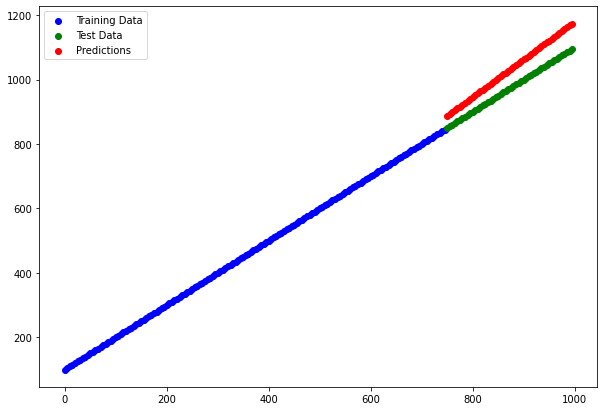

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training Data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test Data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

## The missing peice: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)

])

# 2. Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 973us/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 981us/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 966us/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 944us/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 979us/step - loss: 3.7724 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9616 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 983us/step - loss: 3.6369 - accuracy: 0.4227
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9298 - accuracy: 0.3950
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5803 - accuracy: 0.44

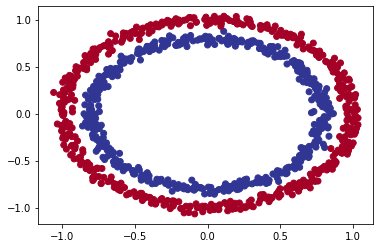

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

doing binary classification


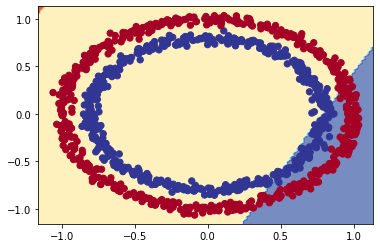

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try to build our first neural network with a non-linear activation function

In [ ]:
# Set the random seed
tf.random.set_seed(42) 

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 961us/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 960us/step - loss: 3.7724 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 983us/step - loss: 3.9616 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 985us/step - loss: 3.6369 - accuracy: 0.4227
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9298 - accuracy: 0.3950
Epoch 10/100
32/32 [==============================] - 0s 922us/step - loss: 3.5803 - accuracy: 0.4409

In [ ]:
# Time to replicate the multi-layer neural network form TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 7.9753 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 983us/step - loss: 7.8983 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.8184 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7682 - accuracy: 0.4964
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7.9795 - accuracy: 0.4827
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.2219 - accuracy: 0.5318
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.6230 - accuracy: 0.5058
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7149 - accuracy: 0.4998
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 8.0269 - accuracy: 0.4796
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.4648 - accuracy: 0.5161
Epoch 1

In [ ]:
# Evalute the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 923us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


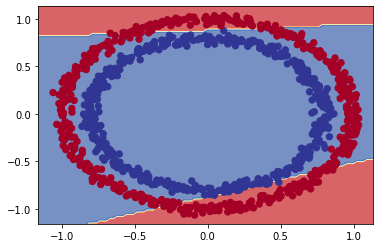

In [ ]:
# How do our model predictions look
plot_decision_boundary(model_6, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.4875
Epoch 2/100
32/32 [==============================] - 0s 986us/step - loss: 0.6870 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5470
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5004
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5259
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5237
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5427
Epoch 8/100
32/32 [==============================] - 0s 987us/step - loss: 0.6808 - accuracy: 0.5396
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5360
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5418
Epoch

In [ ]:
# Evaluate your model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 986us/step - loss: 0.2948 - accuracy: 0.9910


[0.29480037093162537, 0.9909999966621399]

doing binary classification


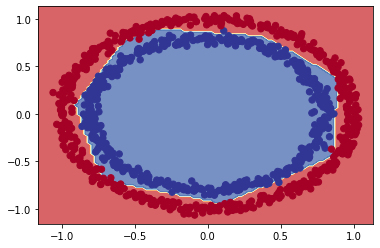

In [ ]:
# Visualize our model
plot_decision_boundary(model_7, X, y)

🧐 **Question:** What's wrong the prediction we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundementals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action. 

In [ ]:
# Create a toy tesor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

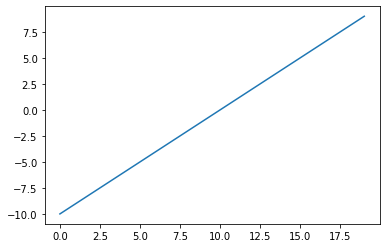

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use our sigmoid function on our toy sensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

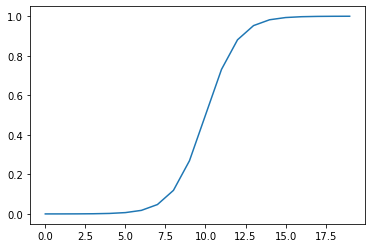

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

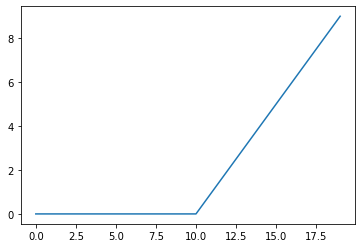

In [ ]:
# Plot relu
plt.plot(relu(A));

In [ ]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

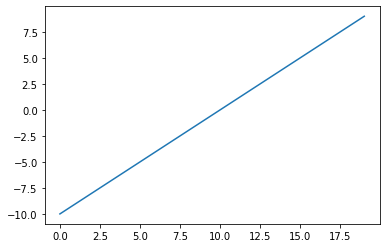

In [ ]:
# Does the linear activation function achange anything?
plt.plot(tf.keras.activations.linear(A));

## Evaluating and improving our classification

So far we've been training and test ing on the same dataset....

However, in machine learning this is basically a sin.

So we'll create a training and test set.

In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recrate a model to fit on the training data and evaluate on the testing data

# set the random seed
tf.random.set_seed(42)

# 1. Create the model (same aas model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

# 3. Fit model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5196
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5344
Epoch 3/25
25/25 [==============================] - 0s 985us/step - loss: 0.6753 - accuracy: 0.5371
Epoch 4/25
25/25 [==============================] - 0s 995us/step - loss: 0.6685 - accuracy: 0.5943
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.5837
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.5798
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6507
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.7259
Epoch 9/25
25/25 [==============================] - 0s 970us/step - loss: 0.6021 - accuracy: 0.7919
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7704
Epoch 11/25
2

In [ ]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

doing binary classification
doing binary classification


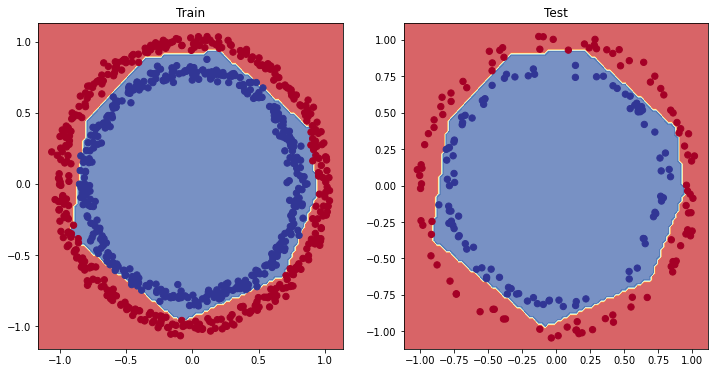

In [ ]:
# Plot the descision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [ ]:
# Conver the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


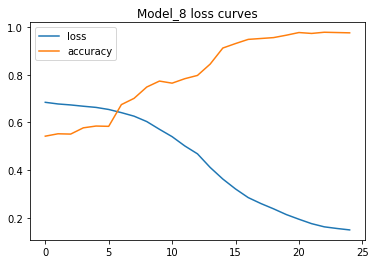

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves');

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting ground truth lables).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decrease the most during training) we're going to use the following steps:
* A learning rate **callback** - you can thingk of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same on as above, but we're practicing building models here).
* A modified loss curves plot.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 =tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, 
                        y_train, 
                        epochs=100, 
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5016
Epoch 2/100
25/25 [==============================] - 0s 997us/step - loss: 0.6929 - accuracy: 0.5065
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5094
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4864
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4857
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5191
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5292
Epoch 8/100
25/25 [==============================] - 0s 990us/step - loss: 0.6845 - accuracy: 0.5055
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4750
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.4965
Epoch

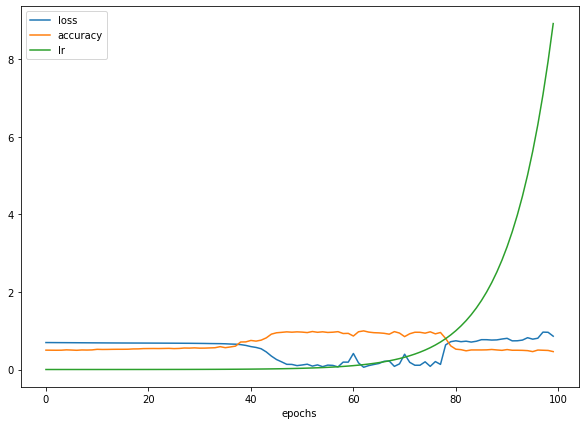

In [ ]:
# Check the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel='epochs');

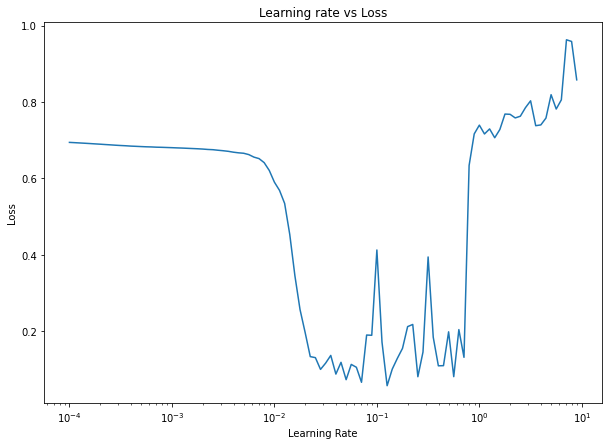

In [ ]:
# plot t he learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss');

In [ ]:
 # Example of other typical learning rates values:
 10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a hige3r ideal learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model 
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with the ideal learning rate
model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=['accuracy'])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)


Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5400
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5511
Epoch 3/20
25/25 [==============================] - 0s 936us/step - loss: 0.6638 - accuracy: 0.5568
Epoch 4/20
25/25 [==============================] - 0s 947us/step - loss: 0.6416 - accuracy: 0.6380
Epoch 5/20
25/25 [==============================] - 0s 993us/step - loss: 0.5957 - accuracy: 0.7609
Epoch 6/20
25/25 [==============================] - 0s 979us/step - loss: 0.5134 - accuracy: 0.8213
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.8078
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8941
Epoch 9/20
25/25 [==============================] - 0s 993us/step - loss: 0.3248 - accuracy: 0.9016
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2665 - accuracy: 0.9386
Epoch 11/

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740181356668472, 0.9900000095367432]

In [ ]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

doing binary classification
doing binary classification


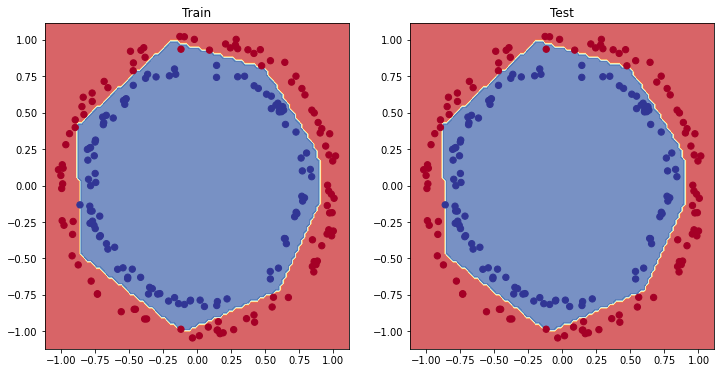

In [ ]:
# Plot the decision boundries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show();

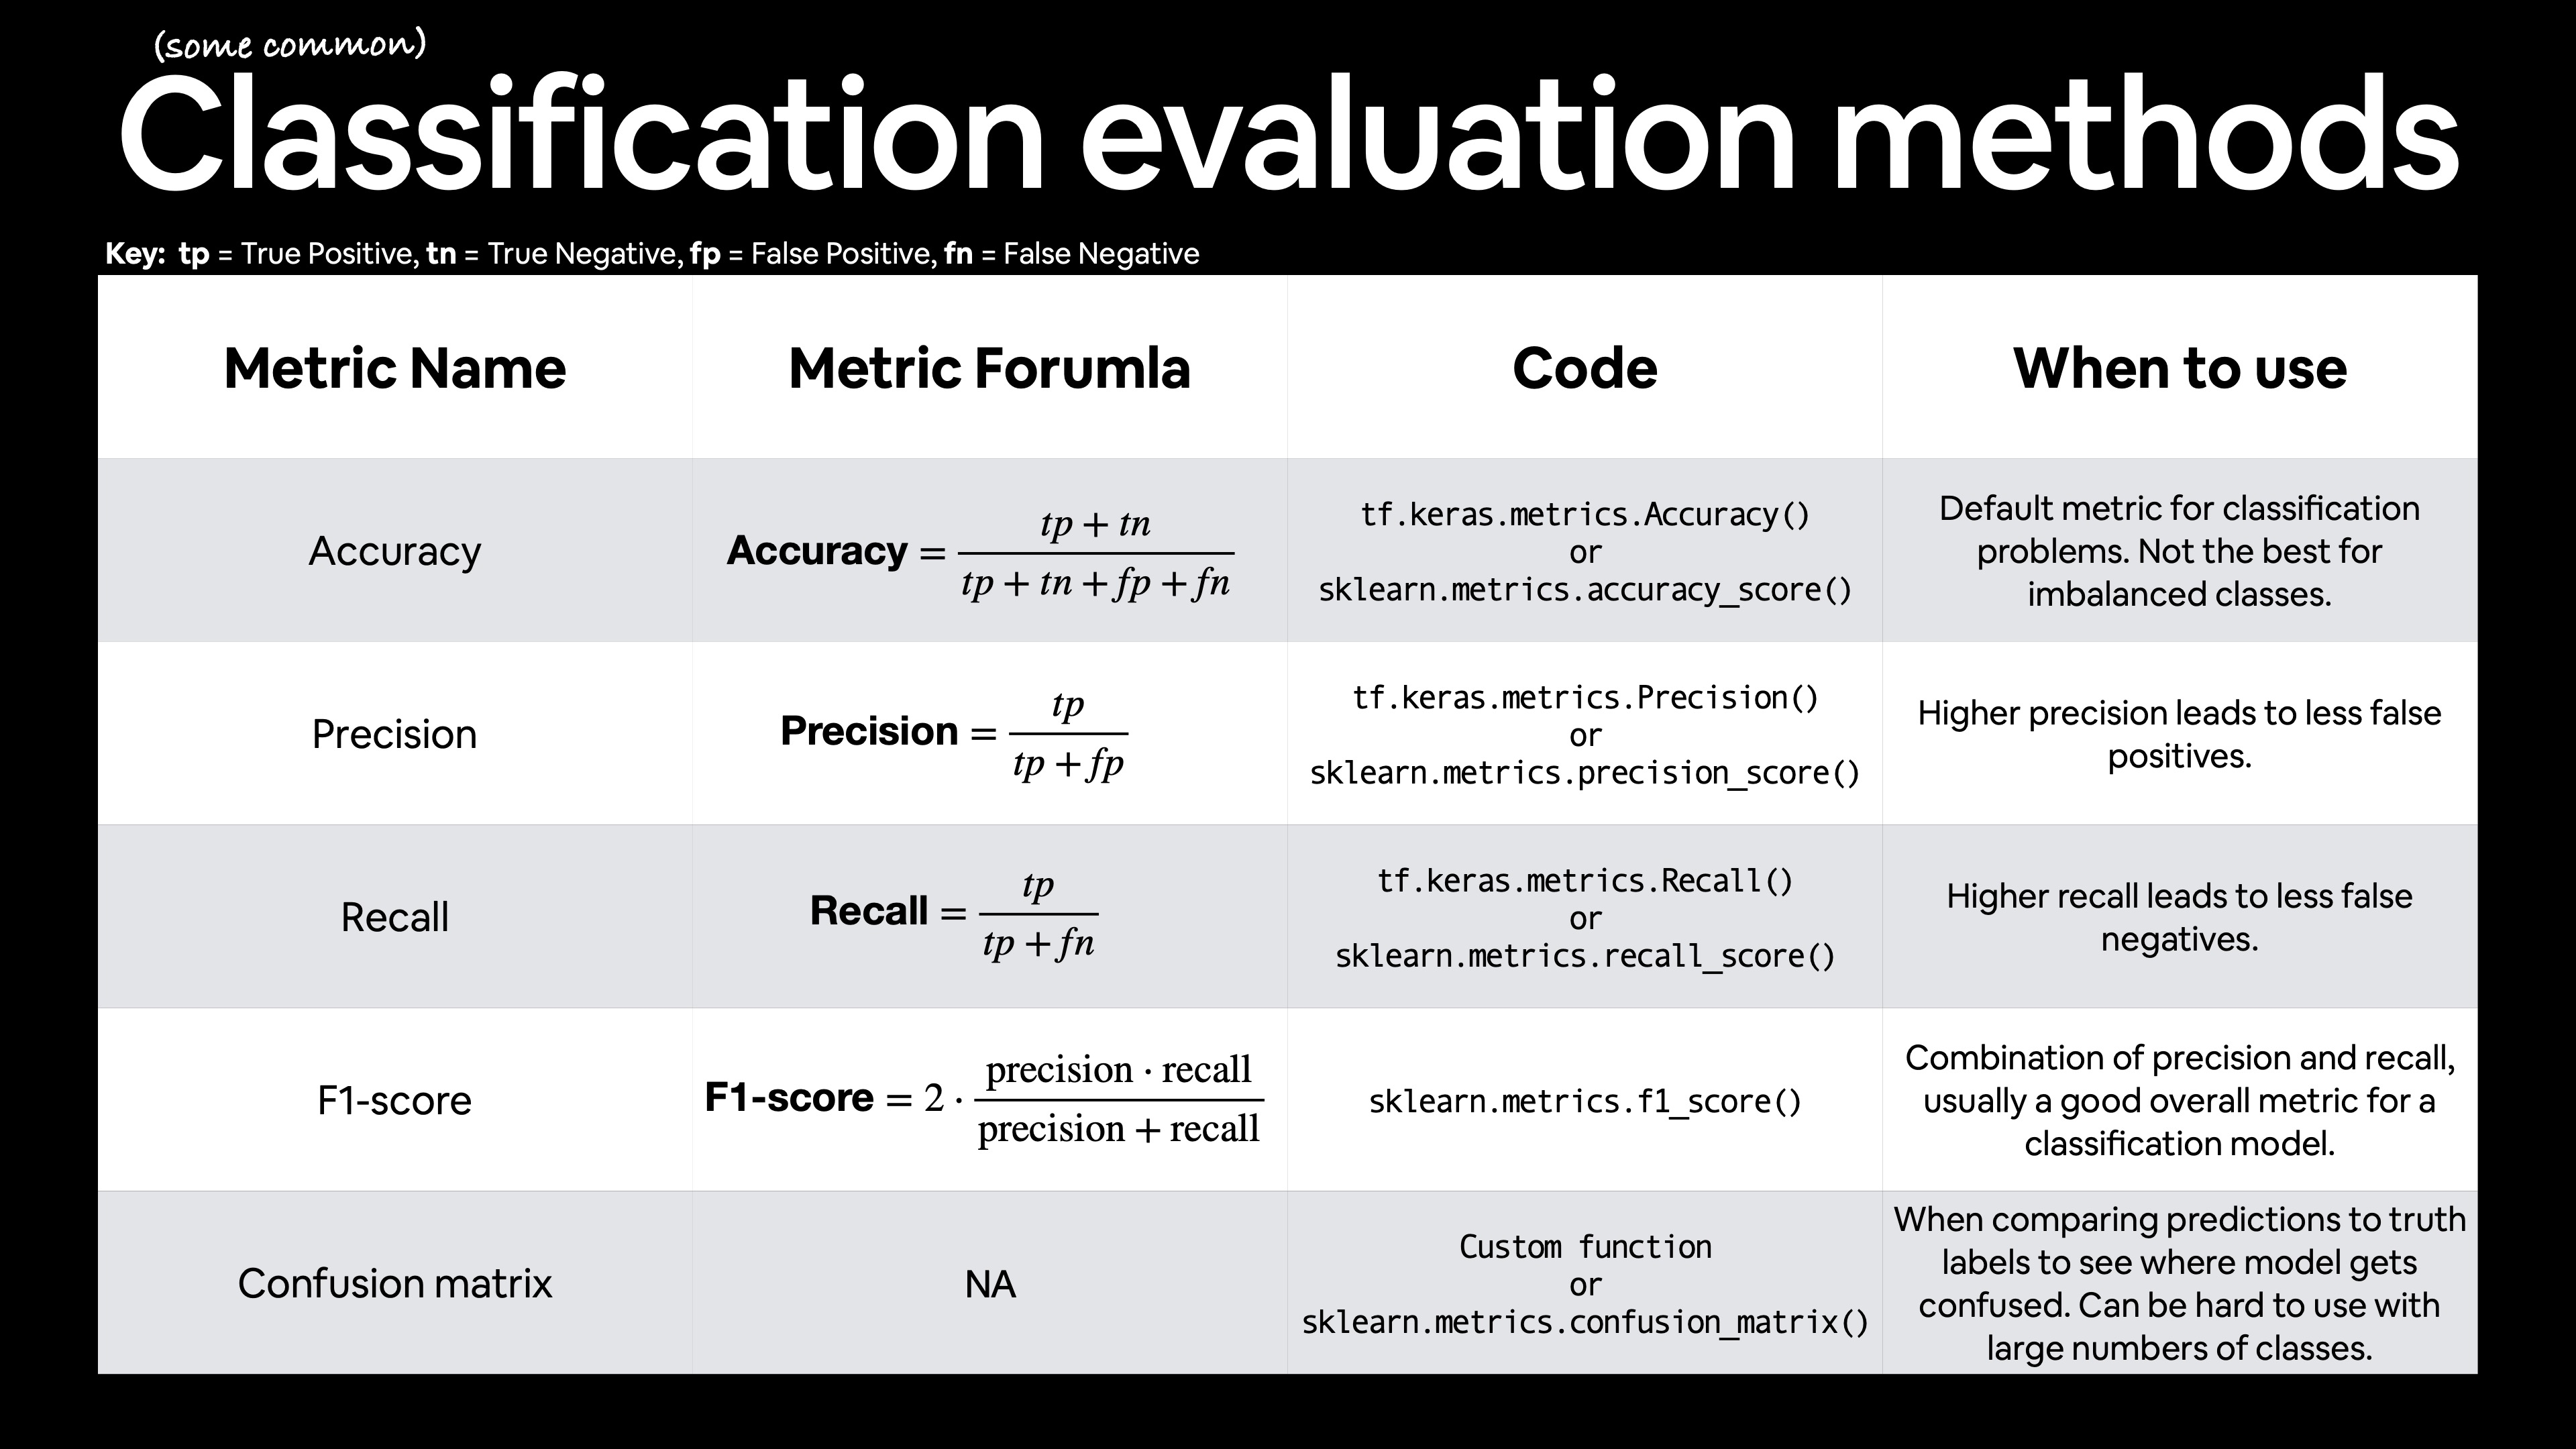

## More classificat ion evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other calssification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision 
* Recall
* F1-score
* Confusion matrix
* Classification report (Scikit-Learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
# Check the accuracy of our model

loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100): .2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740181356668472
Model accuracy on the test set:  99.00%


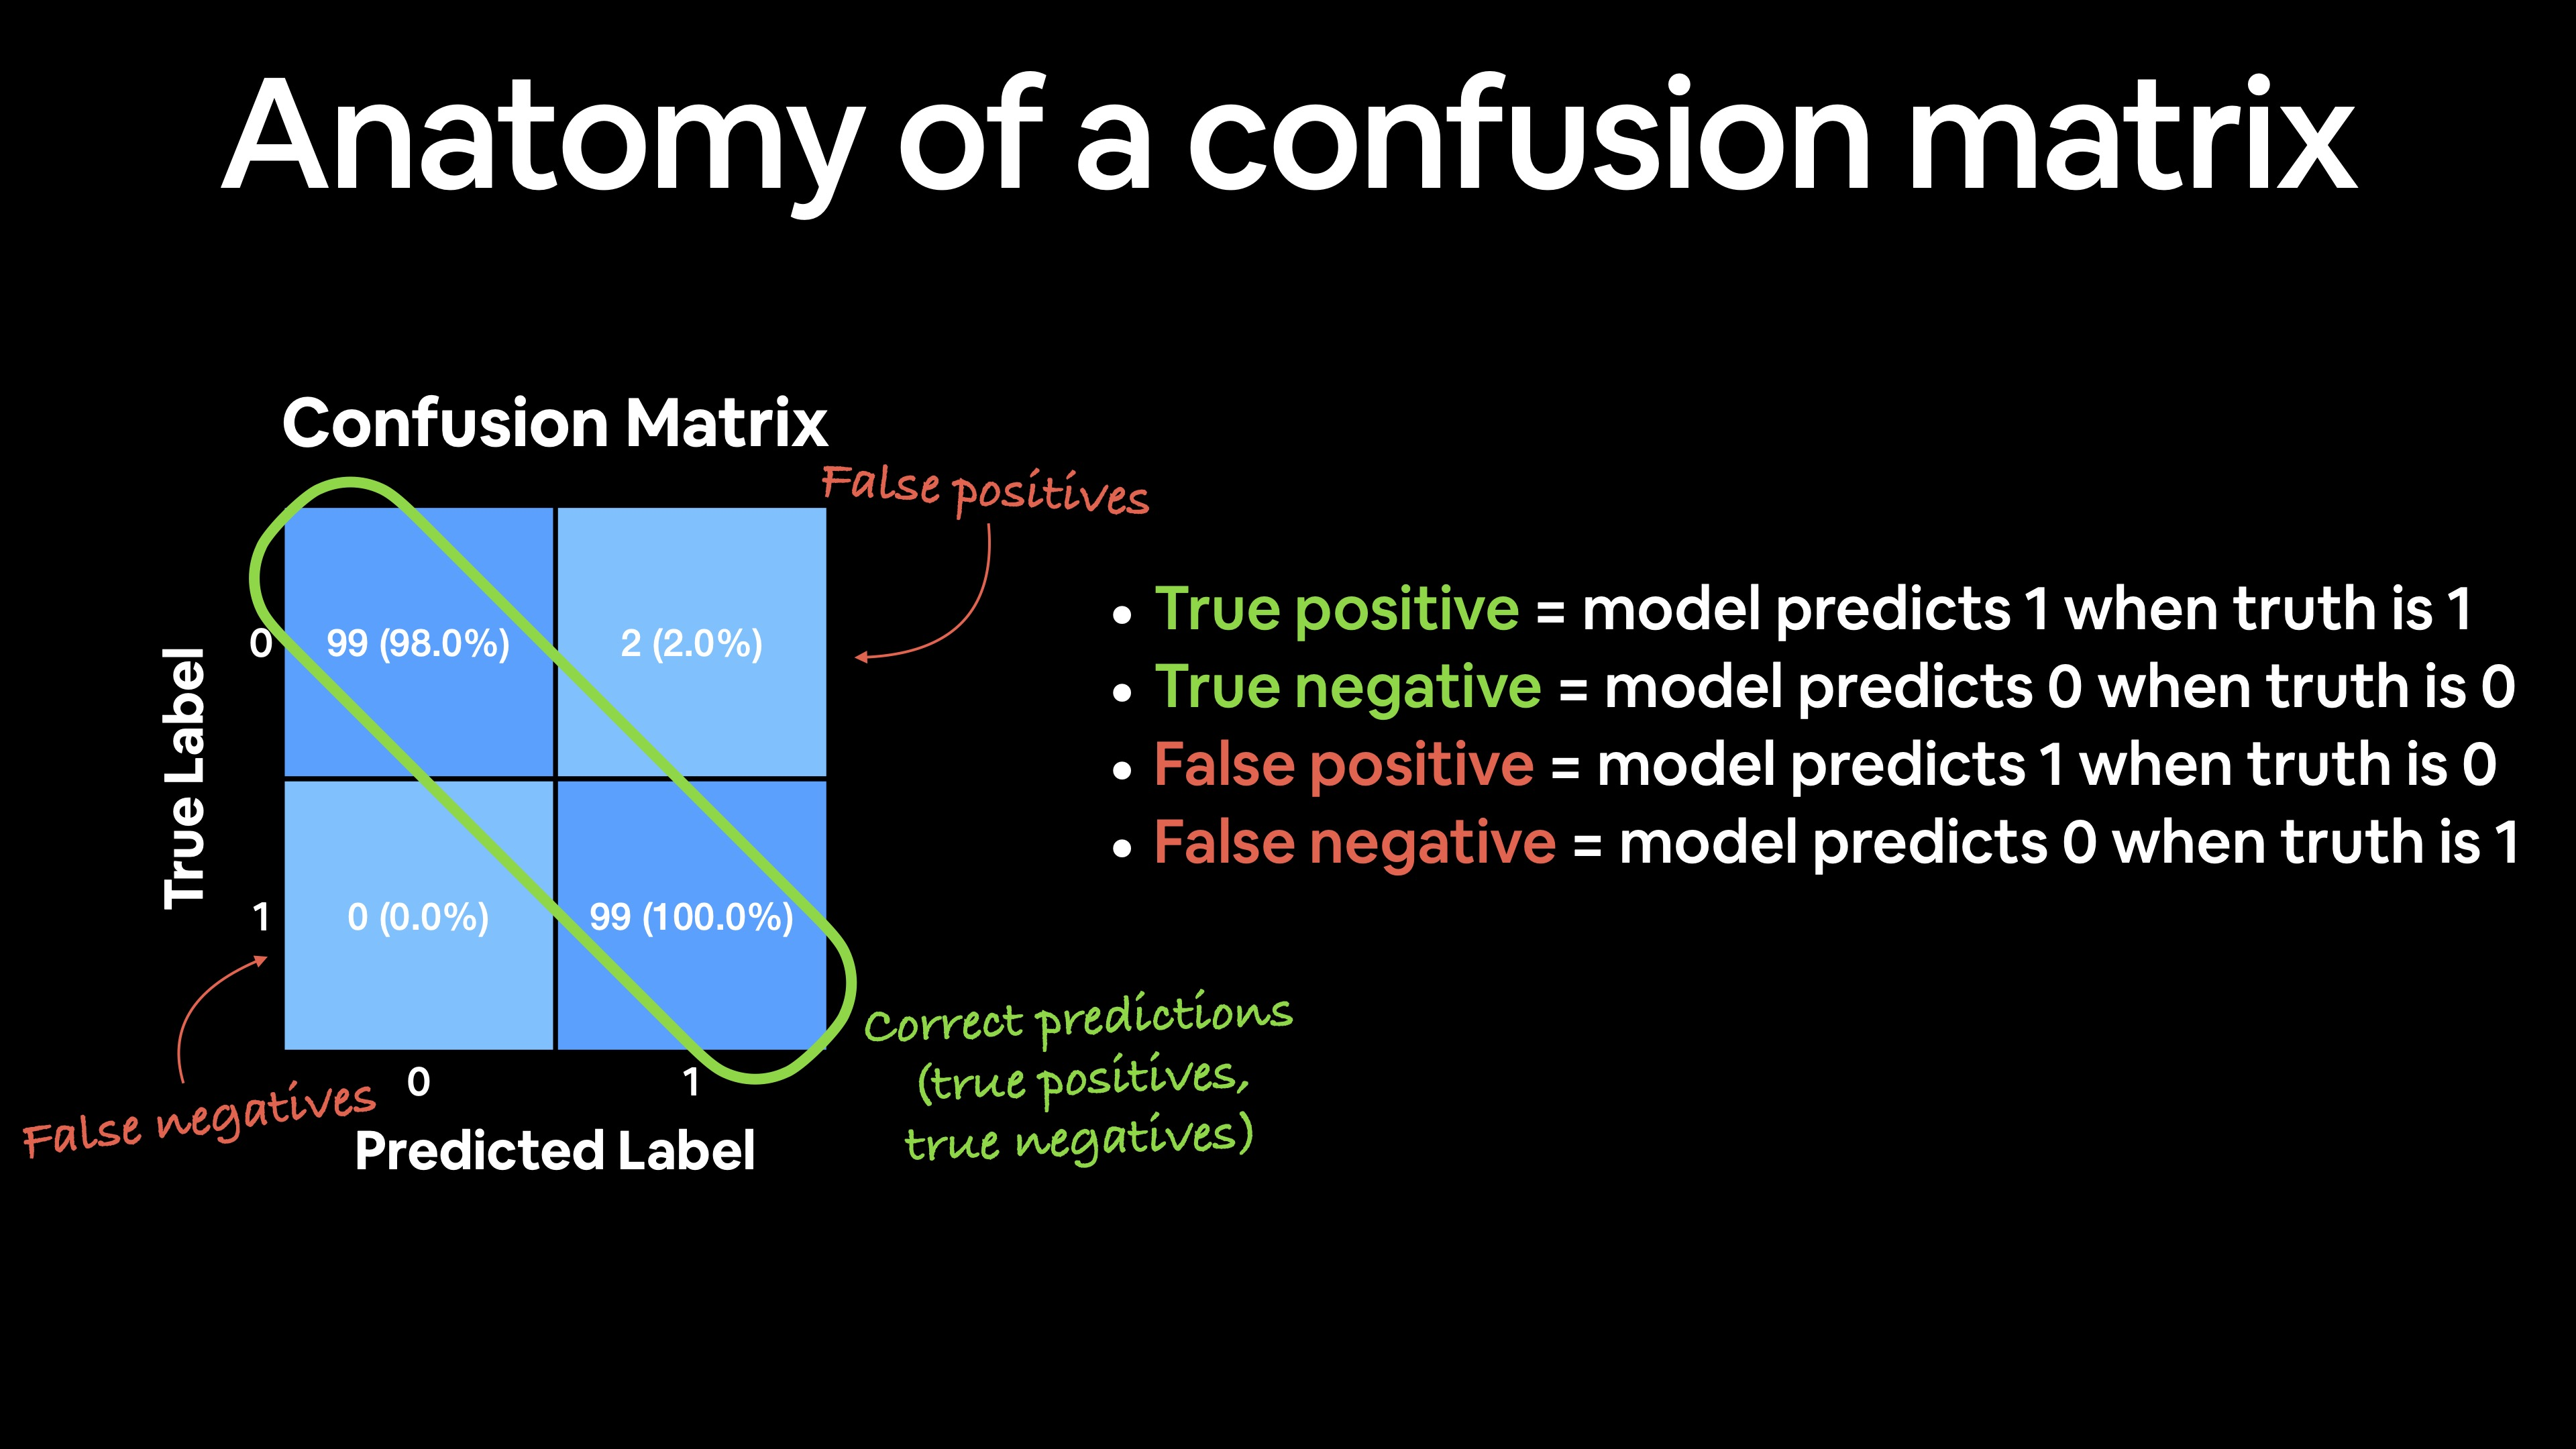How about a confusion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

Oops... Looks like our predictions array (y_preds) has come out in **prediction probability** from.. the standard output from the sigmoid (or softmax) activation functions. Made the corrections to add the `tf.round()`

In [ ]:
# Convert predictions probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

How about we prettify our confusion matrix?

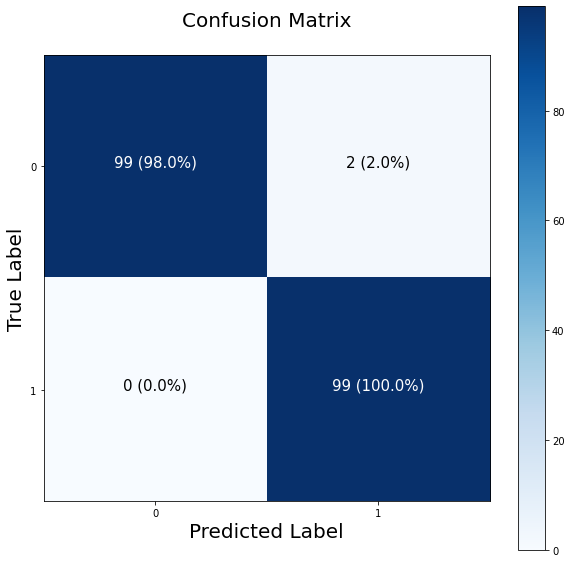

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of sckikit-learn's plot confusion matrix function.
# https://github.com/scikit-learn/scikit-learn/blob/95119c13a/sklearn/metrics/_plot/confusion_matrix.py#L165

import itertools 

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True Label', 
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot  the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have a deifferent classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class calssification, we're going to build a neural network to classify images of different items of clothing.
 


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data hs already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training examplej
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

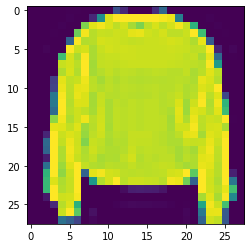

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
# Check out samples label
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

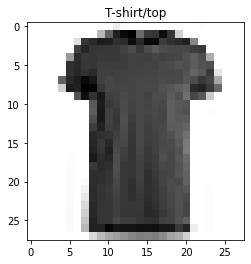

In [ ]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

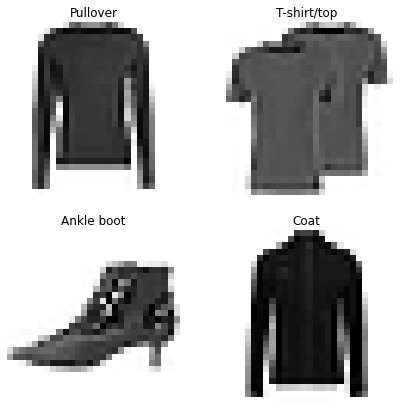

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Build a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classificers, however, we're going to have to tweek a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategroicalCrossentropy()
    * If your labels are one-hot encoded, use CategoricalCrossentropy()
    * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [ ]:
# When first completing the model ran into a shape error. Did the following check
# Our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape


(None, 784)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # If input errors check here
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax) # If input errors check here
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # If input errors check here
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.8192 - accuracy: 0.1345 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7426 - accuracy: 0.2323 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6413 - accuracy: 0.2837 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6065 - accuracy: 0.2888 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5988 - accuracy: 0.3031 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5888 - accuracy: 0.3078 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5668 - accuracy: 0.3213 - val_loss: 1.5695 - val_accuracy:

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_28 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normailzed), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the max
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and mx values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it 

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax) 
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

🔑 **Note:** Neural net works tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

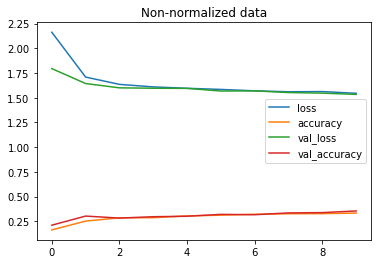

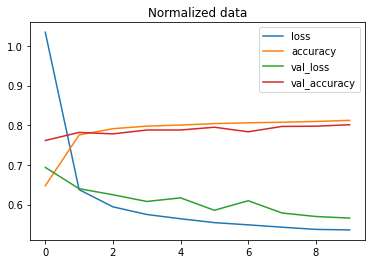

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different archeitecture).

## Finding the ideal learning rate

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')                                
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create the leanring rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm, test_labels),
                             callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

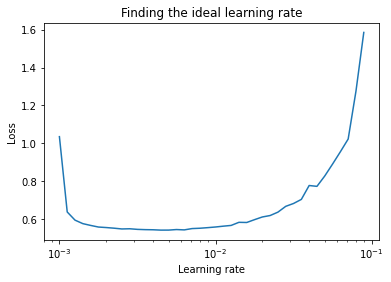

In [ ]:
# Plot the learning rate decay curve

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

It appears that the ideal learning rate is the keras learning rate.

In [ ]:
# Let's refit a model with the ideal learning rate

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')                                
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=['accuracy'])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                             train_labels,
                             epochs=20,
                             validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecutre)
* Save and export it for use in an application

Let's go through the top 2...

In [ ]:
# Create a confusion matix
import itertools
from sklearn.metrics import confusion_matrix 

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label', 
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # set x-axis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot  the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment='center',
                color='white' if cm[i, j] > threshold else 'black',
                size=15)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 precitions
y_probs[:5]

array([[8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01],
       [3.4278683e-06, 1.2899412e-16, 9.5989138e-01, 2.0516255e-07,
        1.5329245e-02, 2.4532243e-13, 2.4142915e-02, 1.1383623e-28,
        6.3271803e-04, 4.4789552e-08],
       [6.1063176e-05, 9.9657673e-01, 4.3867061e-08, 3.3405994e-03,
        1.3249499e-05, 1.4383491e-21, 8.2790693e-06, 7.3237471e-18,
        5.4811817e-08, 4.9225428e-14],
       [7.5031145e-05, 9.9053687e-01, 4.2528288e-07, 9.2231687e-03,
        1.3623090e-04, 1.8276231e-18, 2.6808115e-05, 4.8124743e-14,
        1.4521548e-06, 2.2211462e-11],
       [7.2190031e-02, 1.5495797e-06, 2.5566885e-01, 1.0363121e-02,
        4.3541368e-02, 1.1069260e-13, 6.1693019e-01, 6.7543135e-23,
        1.3049162e-03, 1.2140360e-09]], dtype=float32)

> 🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Covert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

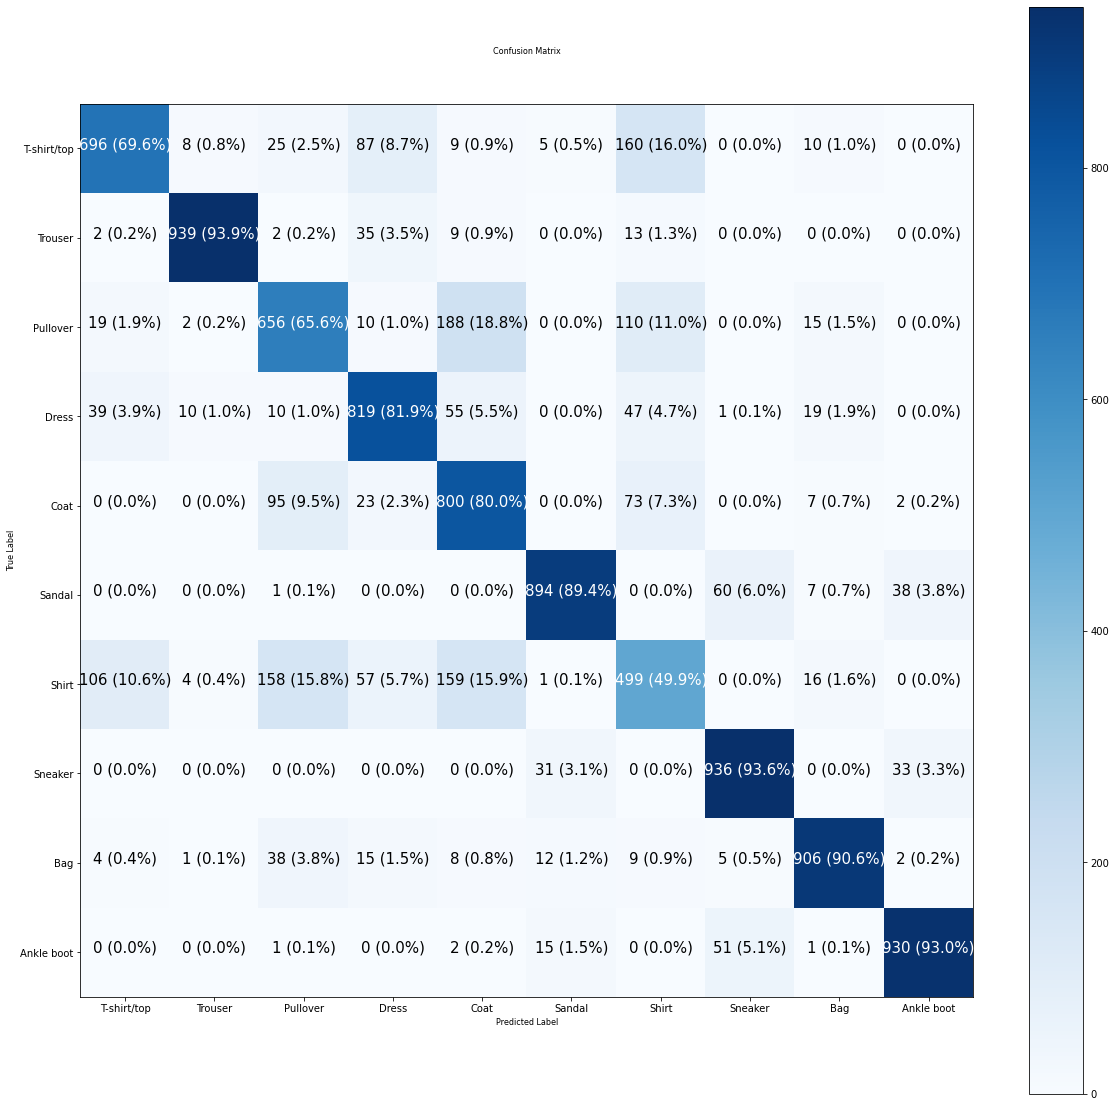

In [ ]:
# Make a prettieer confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(20, 20),
                      text_size=8)

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a futher understanding of the data and the inputs of your models

How about we crate a fun little function for:
* Plot a random image
* Make prediction on said image
* Label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and lables it with a prediction and truth label.
    """
    # Set up random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'

    # Add xlabel information (prediction/true lable)
    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
               color=color) # Set the color to green or red based on if prediction is right or wrong

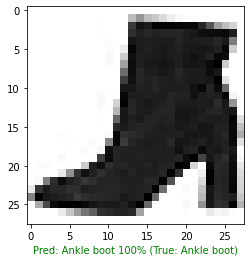

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # Again, always make predictions on the same kind of data of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?



In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a lyaer in our network
weights, biases = model_14.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[ 0.7150263 , -0.06077094, -0.99763054, -1.048431  ],
        [ 0.27732128, -0.47155392, -0.5291646 ,  0.02329262],
        [ 0.775243  ,  0.540276  , -1.1288569 , -0.7426157 ],
        ...,
        [-0.39453438,  0.47628698, -0.22641574,  0.25505954],
        [-0.4051576 ,  0.6181001 ,  0.23928389, -0.5038765 ],
        [ 0.23884599,  0.11606929, -0.12131333,  0.04352435]],
       dtype=float32), (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_36 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_37 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector...

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([ 2.4485605e-02, -6.1463297e-04, -2.7230164e-01,  8.1124890e-01],
       dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix

The bias vector get intitalized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_36 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_37 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


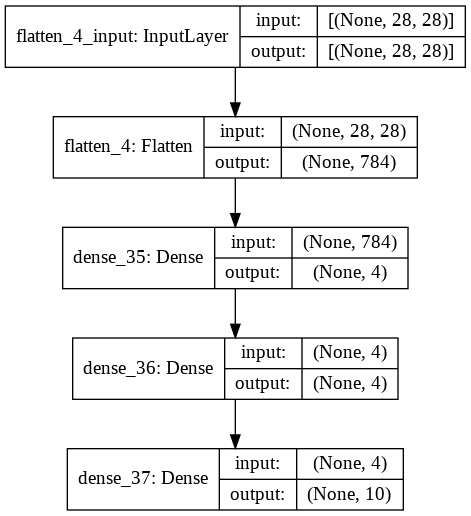

In [ ]:
 # Let's check out another way of viewing our deep learning models
 from tensorflow.keras.utils import plot_model
 # See the inputs and outputs of each layer
 plot_model(model_14, show_shapes=True)